In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

## Loading data

In [59]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [60]:
train_df_1 = train_df.copy()
test_df_1 = test_df.copy()

In [61]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [62]:
train_df_1.shape

(8693, 14)

In [63]:
test_df_1.shape

(4277, 13)

In [67]:
train_df_1['Transported'].value_counts(normalize=True)
#about 50% of passengers in train were transported to another dimension

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

In [69]:
train_df_1['HomePlanet']

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

## Completeness of data

## EDA

<Axes: title={'center': 'VIP'}, xlabel='VIP'>

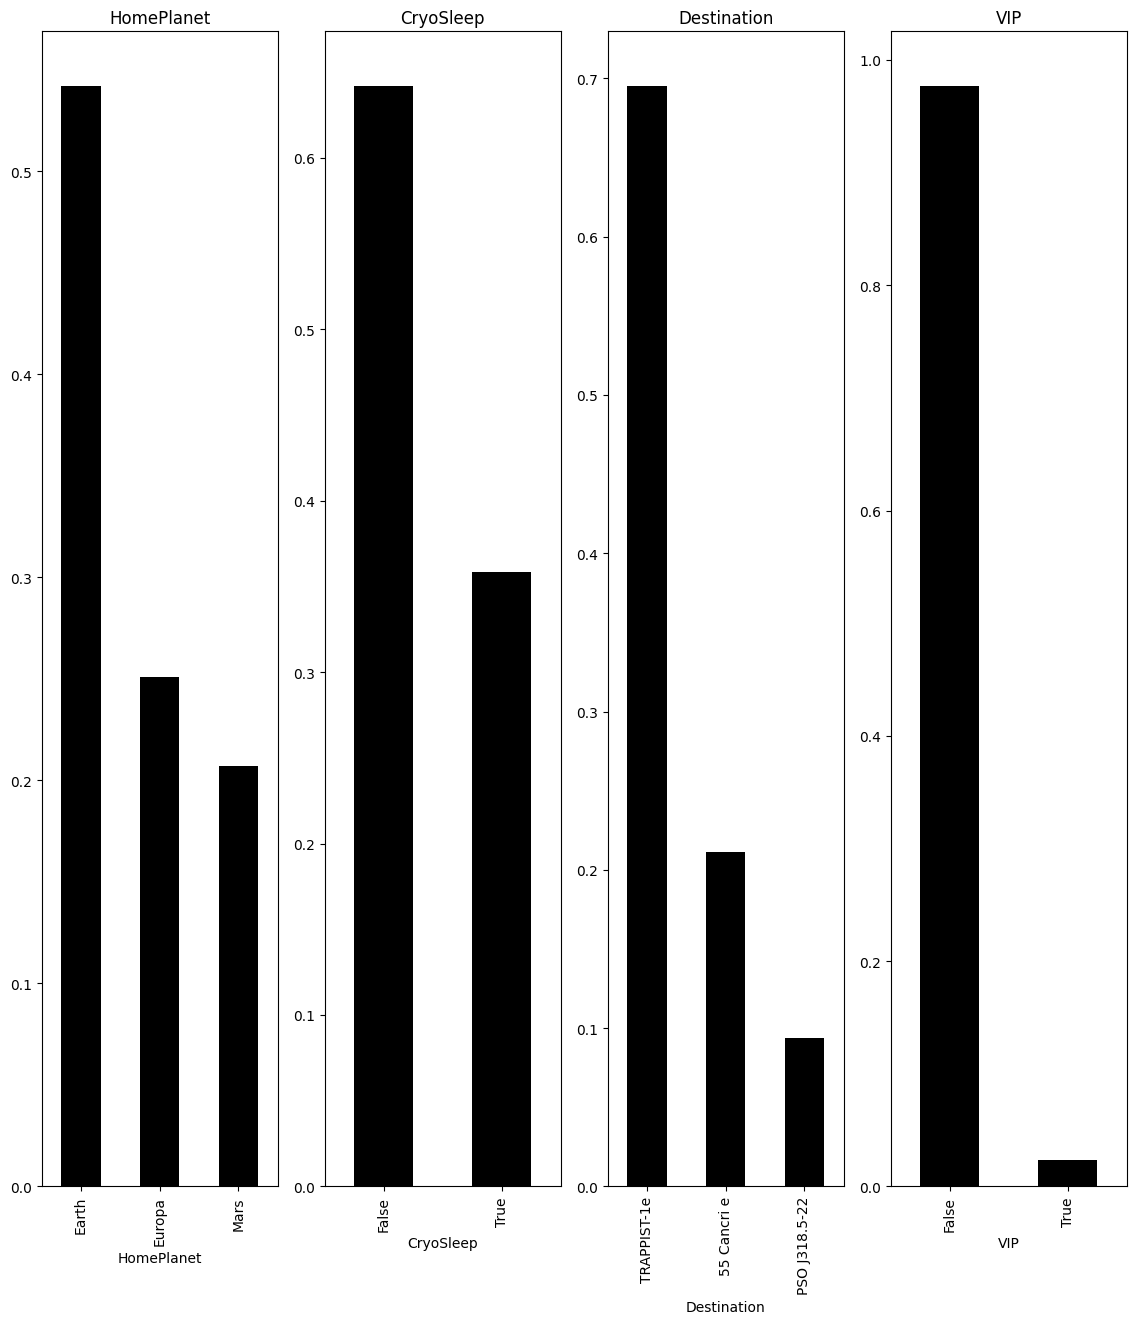

In [70]:
plt.figure(figsize = (14, 15)) 
plt.subplot(141)
train_df_1['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet', color='black')
plt.subplot(142)
train_df_1['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep', color='black')
plt.subplot(143)
train_df_1['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination', color='black')
plt.subplot(144)
train_df_1['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP', color='black')

In [71]:
train_df_1['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

<Axes: title={'center': 'CabinSide'}, xlabel='CabinSide'>

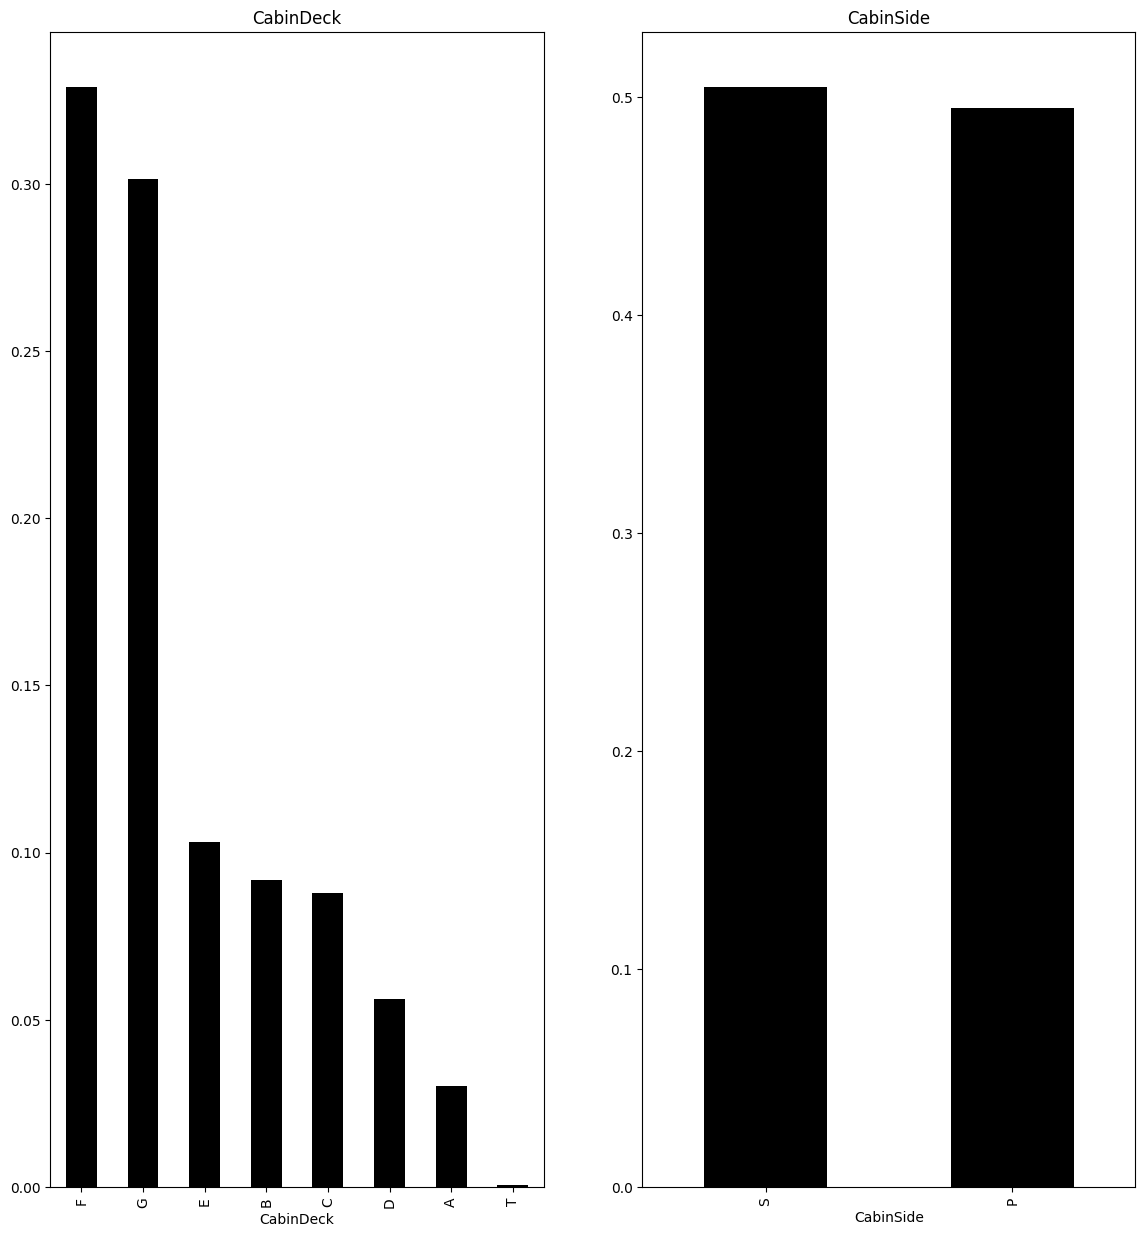

In [73]:
#splitting cabin column into 3 different columns deck/num/side
train_df_1[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df_1["Cabin"].str.split('/', expand = True)

# Visualize cabin feature
plt.figure(figsize = (14, 15)) 
plt.subplot(121)
train_df_1['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck', color='black')
plt.subplot(122)
train_df_1['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide', color='black')

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_20300\2173524538.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['Age'], color='black');


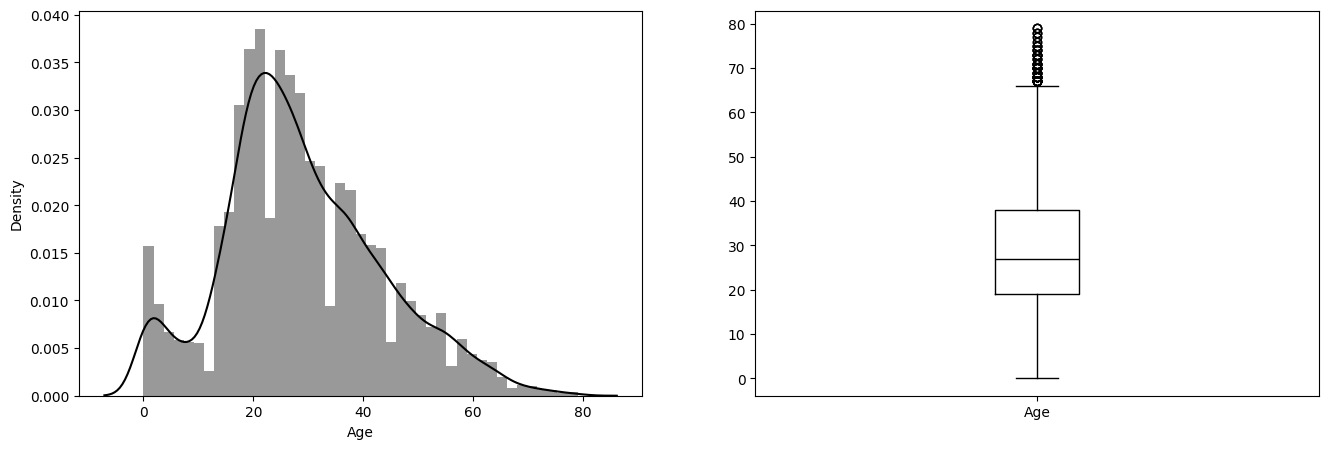

In [75]:
# Visualize Age variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['Age'], color='black');
plt.subplot(122)
train_df_1['Age'].plot.box(figsize = (16, 5), color='black');
plt.show()

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_20300\3539753161.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['RoomService'], color='black');


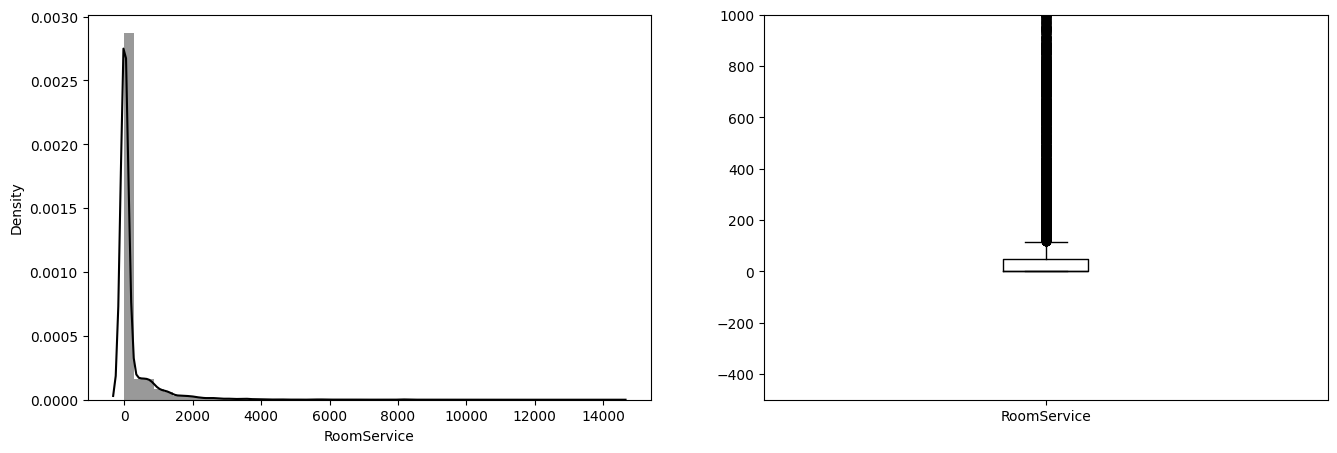

In [76]:
# Visualize RoomService variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['RoomService'], color='black');
plt.subplot(122)
train_df_1['RoomService'].plot.box(figsize = (16, 5), color='black');
plt.ylim([-500, 1000])
plt.show()

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_20300\1113203449.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['Spa'], color='black');


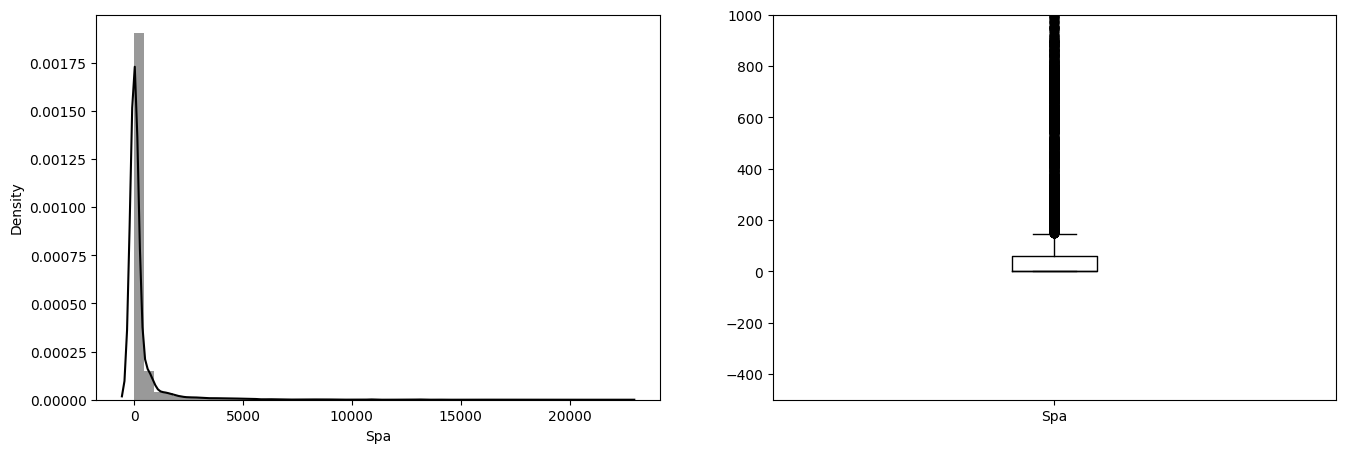

In [77]:
# Visualize Spa variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['Spa'], color='black');
plt.subplot(122)
train_df_1['Spa'].plot.box(figsize = (16, 5), color='black');
plt.ylim([-500, 1000])
plt.show()

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_20300\3176035232.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['VRDeck'], color='black');


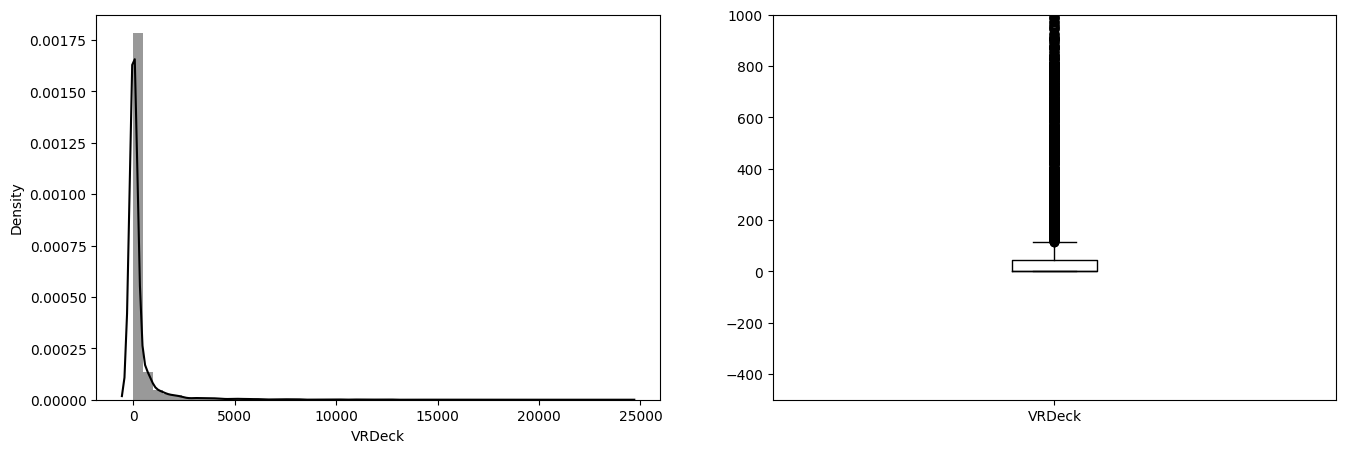

In [79]:
# Visualize VRDeck variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['VRDeck'], color='black');
plt.subplot(122)
train_df_1['VRDeck'].plot.box(figsize = (16, 5), color='black');
plt.ylim([-500, 1000])
plt.show()

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_20300\4198592768.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['FoodCourt'], color='black');


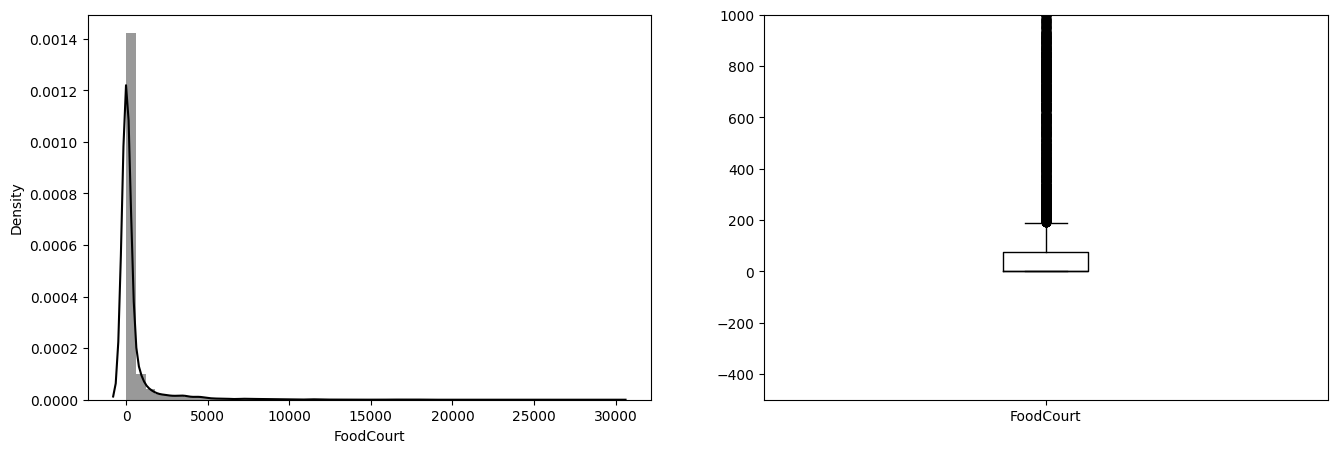

In [81]:
# Visualize FoodCourt variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['FoodCourt'], color='black');
plt.subplot(122)
train_df_1['FoodCourt'].plot.box(figsize = (16, 5), color='black');
plt.ylim([-500, 1000])
plt.show()

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_20300\2469924458.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['ShoppingMall'], color='black');


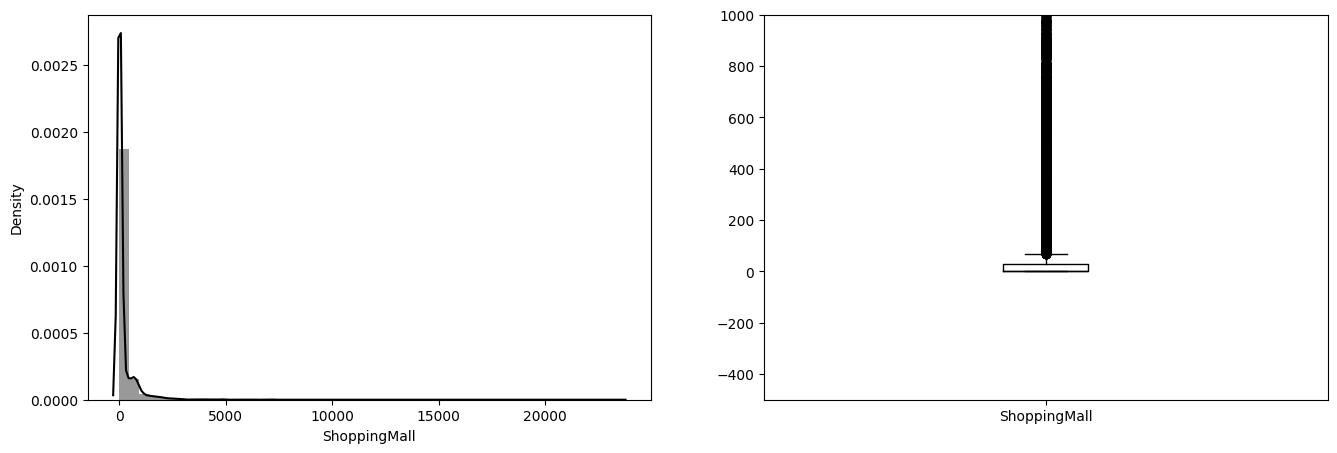

In [82]:
# Visualize ShoppingMall variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['ShoppingMall'], color='black');
plt.subplot(122)
train_df_1['ShoppingMall'].plot.box(figsize = (16, 5), color='black');
plt.ylim([-500, 1000])
plt.show()

In [ ]:
#vrdeck, foodcourt, shoppingmall are not normally distributed

In [83]:
HomePlanet_Transported = train_df_1.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

HomePlanet_Transported['TransportedPercentage'] = HomePlanet_Transported['Transported'] / HomePlanet_Transported['PassengerId']

CryoSleep_Transported = train_df_1.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CryoSleep_Transported['TransportedPercentage'] = CryoSleep_Transported['Transported'] / CryoSleep_Transported['PassengerId']

Destination_Transported = train_df_1.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Destination_Transported['TransportedPercentage'] = Destination_Transported['Transported'] / Destination_Transported['PassengerId']

VIP_Transported = train_df_1.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

VIP_Transported['TransportedPercentage'] = VIP_Transported['Transported'] / VIP_Transported['PassengerId']


<Axes: xlabel='VIP', ylabel='TransportedPercentage'>

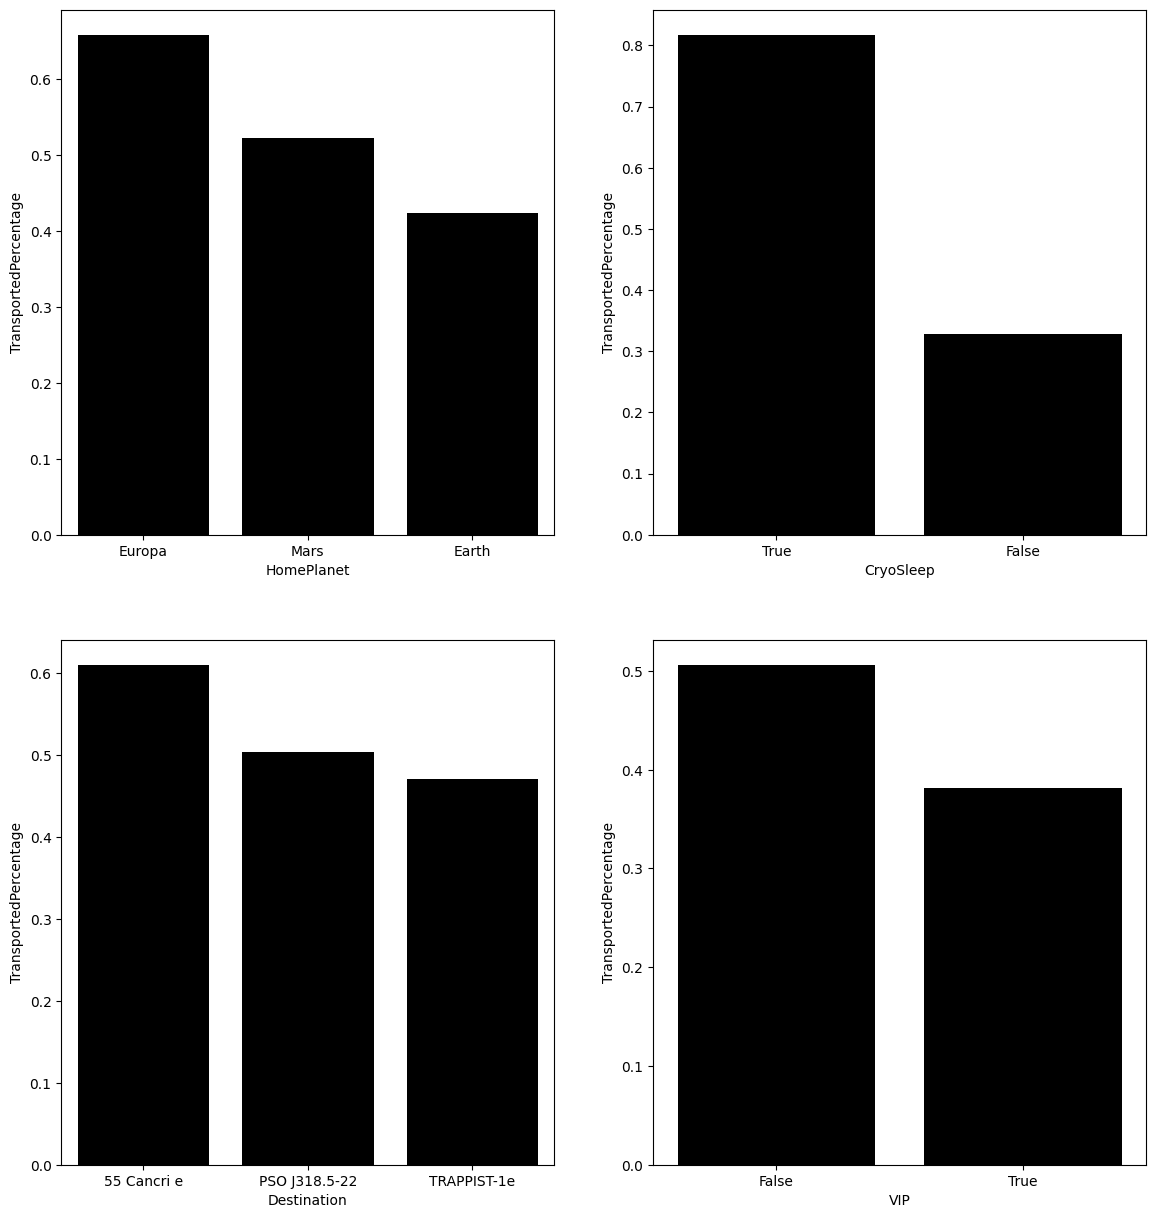

In [85]:
# Visualize categorical features vs target variable
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "HomePlanet", y = "TransportedPercentage", data = HomePlanet_Transported, order = HomePlanet_Transported.sort_values('TransportedPercentage', ascending = False).HomePlanet, color='black')
plt.subplot(222)
sns.barplot(x = "CryoSleep", y = "TransportedPercentage", data = CryoSleep_Transported, order = CryoSleep_Transported.sort_values('TransportedPercentage', ascending = False).CryoSleep, color='black')
plt.subplot(223)
sns.barplot(x = "Destination", y = "TransportedPercentage", data = Destination_Transported, order = Destination_Transported.sort_values('TransportedPercentage', ascending = False).Destination, color='black')
plt.subplot(224)
sns.barplot(x = "VIP", y = "TransportedPercentage", data = VIP_Transported, order = VIP_Transported.sort_values('TransportedPercentage', ascending = False).VIP, color='black')

<Axes: xlabel='CabinSide', ylabel='TransportedPercentage'>

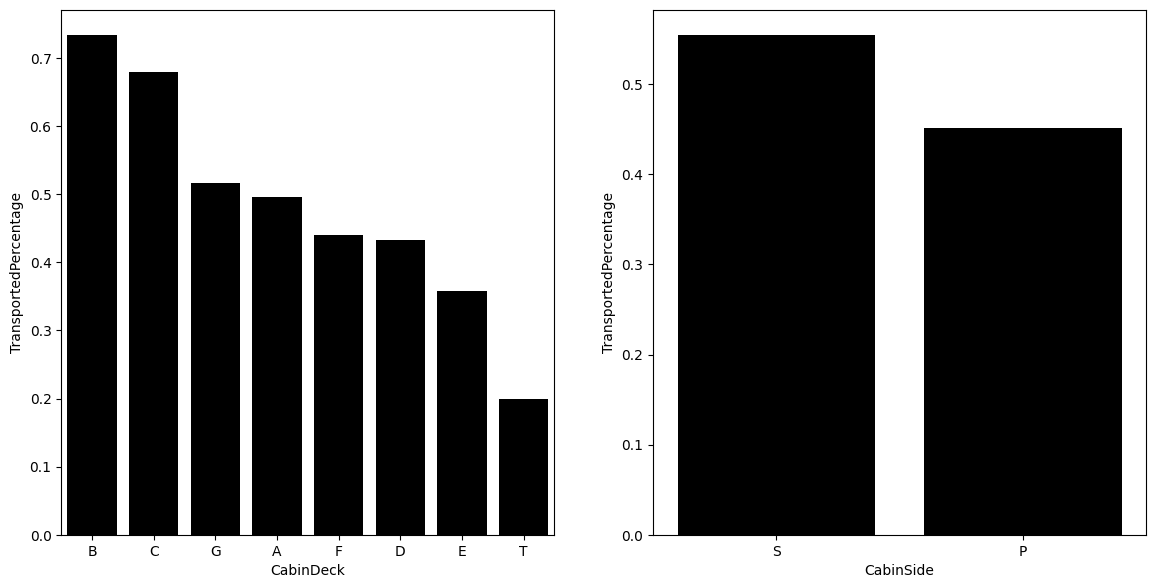

In [86]:
CabinDeck_Transported = train_df_1.groupby('CabinDeck').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinDeck_Transported['TransportedPercentage'] = CabinDeck_Transported['Transported'] / CabinDeck_Transported['PassengerId']

CabinSide_Transported = train_df_1.groupby('CabinSide').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinSide_Transported['TransportedPercentage'] = CabinSide_Transported['Transported'] / CabinSide_Transported['PassengerId']

# Visualize Cabin features vs target variable
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "CabinDeck", y = "TransportedPercentage", data = CabinDeck_Transported, order = CabinDeck_Transported.sort_values('TransportedPercentage', ascending = False).CabinDeck, color='black')
plt.subplot(222)
sns.barplot(x = "CabinSide", y = "TransportedPercentage", data = CabinSide_Transported, order = CabinSide_Transported.sort_values('TransportedPercentage', ascending = False).CabinSide, color='black')


<Axes: xlabel='NoInPassengerGroup', ylabel='TransportedPercentage'>

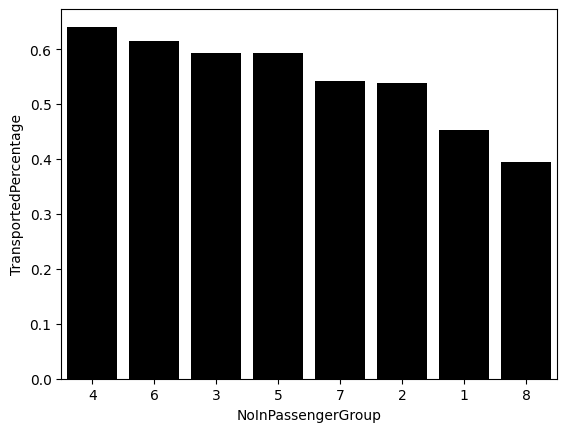

In [87]:
# Extract PassengerGroup column from PassengerId column
train_df_1["PassengerGroup"] = train_df_1["PassengerId"].str.split('_', expand = True)[0]

# Create dataframe -No_People_In_PassengerGroup that contains the PassengerGroup and the no passengers in the group 
No_People_In_PassengerGroup = train_df_1.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
No_People_In_PassengerGroup = No_People_In_PassengerGroup.rename(columns = {"PassengerId": "NoInPassengerGroup"})

train_df_1 = train_df_1.merge(No_People_In_PassengerGroup[["PassengerGroup", "NoInPassengerGroup"]], how = 'left', on = ['PassengerGroup'])
# create dataframe NoInPassengerGroup_Transported that has No of passengers in a group transported and the percentage of passengers in a group transported
NoInPassengerGroup_Transported = train_df_1.groupby('NoInPassengerGroup').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

NoInPassengerGroup_Transported['TransportedPercentage'] = NoInPassengerGroup_Transported['Transported'] / NoInPassengerGroup_Transported['PassengerId']

# Visualize NoInPassengerGroup vs transported
sns.barplot(x = "NoInPassengerGroup", y = "TransportedPercentage", data = NoInPassengerGroup_Transported, order = NoInPassengerGroup_Transported.sort_values('TransportedPercentage', ascending = False).NoInPassengerGroup, color='black')


<Axes: xlabel='IsAlone', ylabel='TransportedPercentage'>

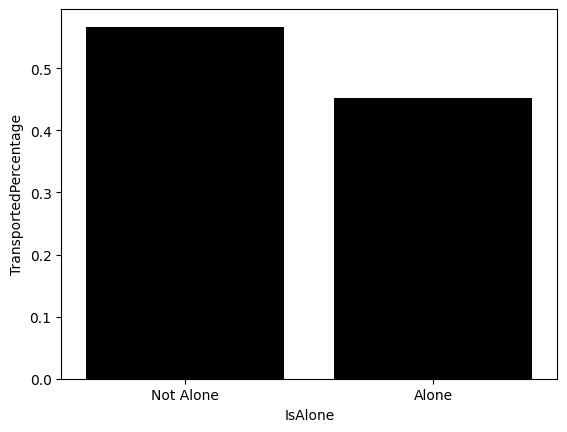

In [88]:
No_People_In_PassengerGroup["IsAlone"] = No_People_In_PassengerGroup["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
train_df_1 = train_df_1.merge(No_People_In_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])

IsAlone_Transported = train_df_1.groupby('IsAlone').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe IsAlone_Transported that contains percentage of passengers transported Alone or Not Alone
IsAlone_Transported['TransportedPercentage'] = IsAlone_Transported['Transported'] / IsAlone_Transported['PassengerId']

# Visualize IsAlone vs transported
sns.barplot(x = "IsAlone", y = "TransportedPercentage", data = IsAlone_Transported, order = IsAlone_Transported.sort_values('TransportedPercentage', ascending = False).IsAlone, color='black')


<Axes: xlabel='FamilySizeCat', ylabel='TransportedPercentage'>

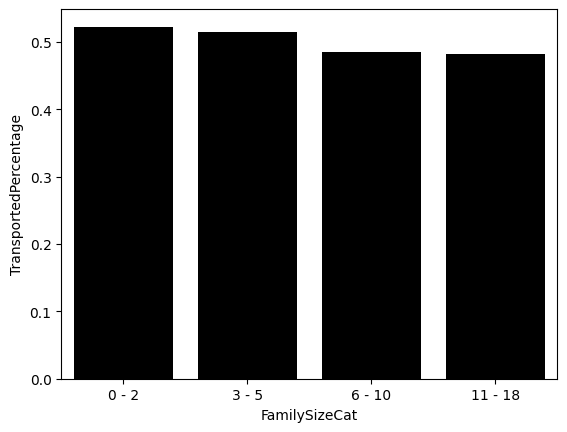

In [91]:
# Extract FamilyName column from Name column
train_df_1["FamilyName"] = train_df_1["Name"].str.split(' ', expand = True)[1]

# Create dataframe -NoRelatives that contains the FamilyName and the no of relatives in a Family
NoRelatives = train_df_1.groupby('FamilyName')['PassengerId'].count().reset_index()
NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})

train_df_1 = train_df_1.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])

train_df_1["FamilySizeCat"] = pd.cut(train_df_1.NoRelatives, bins = [0, 2, 5, 10, 18], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 18'])

# create dataframe FamilySizeCat_Transported that has the Family Size Category and the percentage transported
FamilySizeCat_Transported = train_df_1.groupby('FamilySizeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

FamilySizeCat_Transported['TransportedPercentage'] = FamilySizeCat_Transported['Transported'] / FamilySizeCat_Transported['PassengerId']

# Visualize FamilySizeCat vs transported
sns.barplot(x = "FamilySizeCat", y = "TransportedPercentage", data = FamilySizeCat_Transported, order = FamilySizeCat_Transported.sort_values('TransportedPercentage', ascending = False).FamilySizeCat, color='black')

(-800.0, 12000.0)

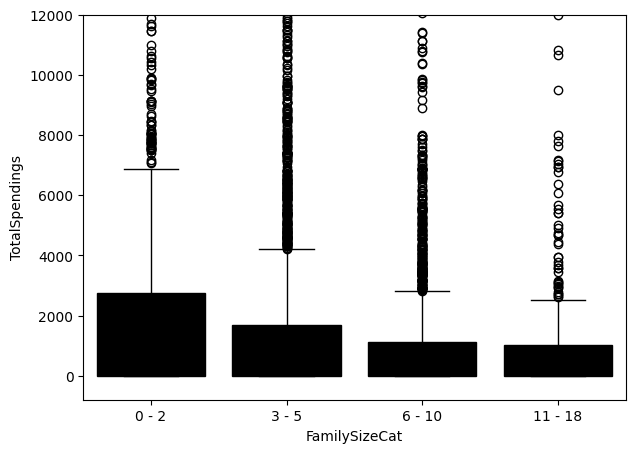

In [92]:
# Create total spending feature
train_df_1["TotalSpendings"] = train_df_1["FoodCourt"] + \
                                 train_df_1["ShoppingMall"] + \
                                 train_df_1["RoomService"] + \
                                 train_df_1["Spa"] + \
                                 train_df_1["VRDeck"]

# FamilySizeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df_1, x = "FamilySizeCat", y = "TotalSpendings", color='black')
plt.ylim([-800, 12000])

(-50.0, 200.0)

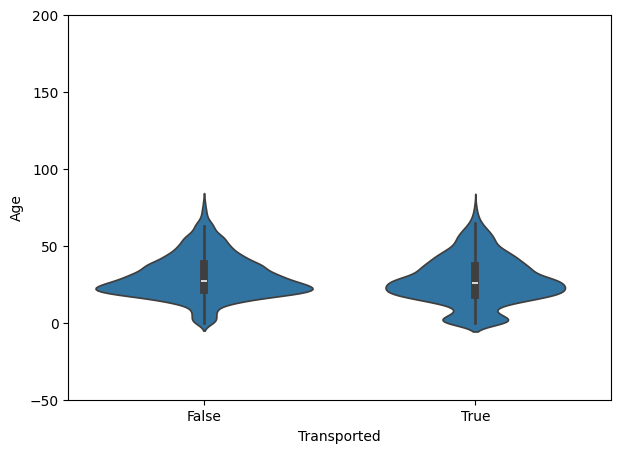

In [95]:
# Transported vs Age
plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["Age"])
plt.ylim([-50, 200])

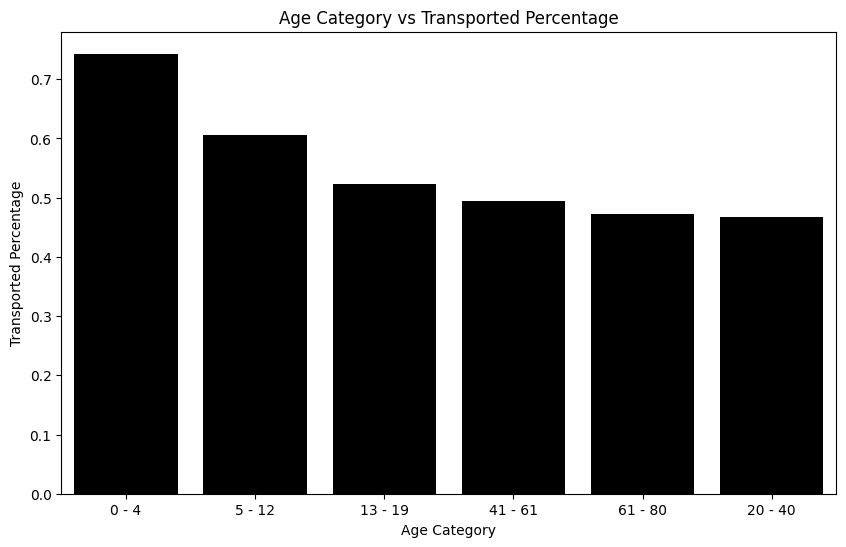

In [101]:
# Extract Age Category column from Age column
train_df_1["AgeCat"] = pd.cut(train_df_1.Age, bins = [0.0, 4.0, 12.0, 19.0, 40.0, 60.0, 80.0], labels = ['0 - 4', '5 - 12', '13 - 19', '20 - 40', '41 - 61', '61 - 80'])

AgeCat_Transported = train_df_1.groupby('AgeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe AgeCat_Transported that has the Age Category and the percentage transported
AgeCat_Transported['TransportedPercentage'] = AgeCat_Transported['Transported'] / AgeCat_Transported['PassengerId']

# Visualize AgeCat vs transported
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeCat", y="TransportedPercentage", data=AgeCat_Transported, order=AgeCat_Transported.sort_values('TransportedPercentage', ascending=False)['AgeCat'], color='black')
plt.xlabel('Age Category')
plt.ylabel('Transported Percentage')
plt.title('Age Category vs Transported Percentage')
plt.show()

(-800.0, 2000.0)

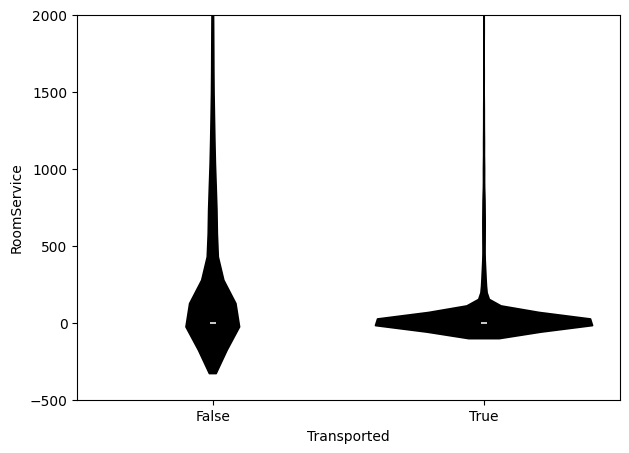

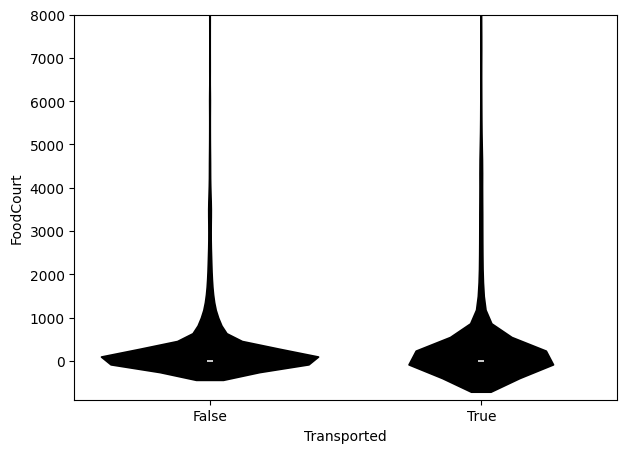

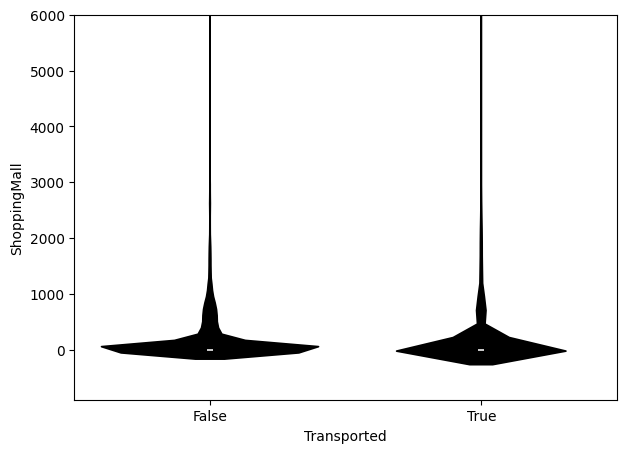

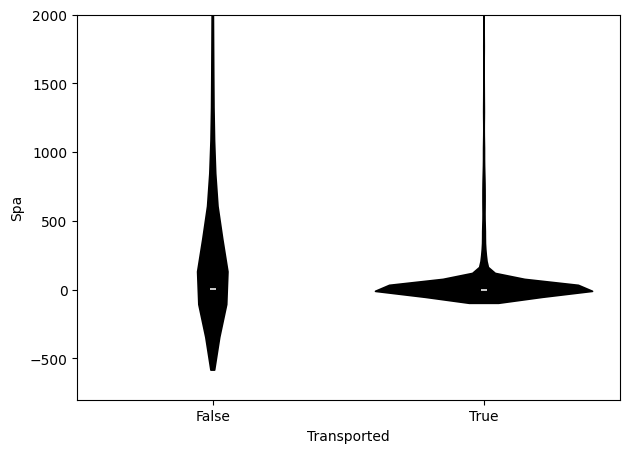

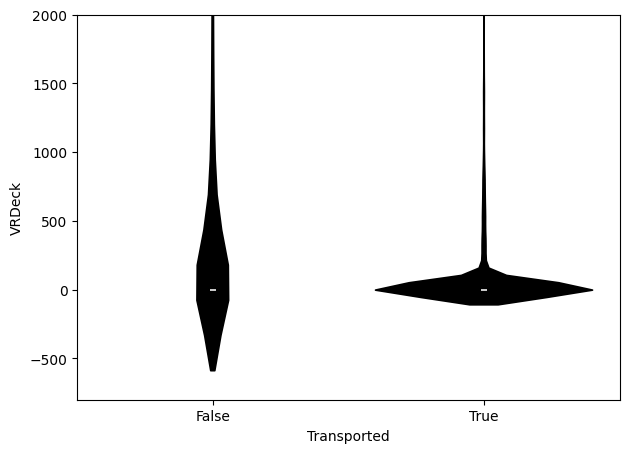

In [103]:
#  RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
plt.figure(figsize = (7, 5)) 
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["RoomService"], color='black')
plt.ylim([-500, 2000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["FoodCourt"], color='black')
plt.ylim([-900, 8000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["ShoppingMall"], color='black')
plt.ylim([-900, 6000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["Spa"], color='black')
plt.ylim([-800, 2000])

plt.figure(figsize = (7, 5))
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["VRDeck"], color='black')
plt.ylim([-800, 2000])

(-900.0, 14000.0)

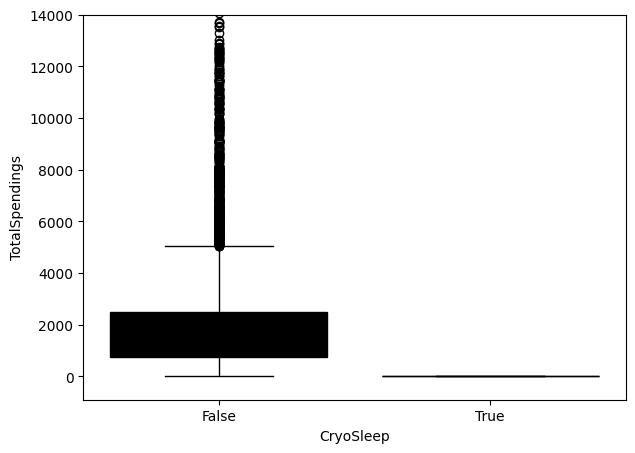

In [105]:
# CryoSleep vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df_1, x = "CryoSleep", y = "TotalSpendings", color='black')
plt.ylim([-900, 14000])

(-800.0, 12000.0)

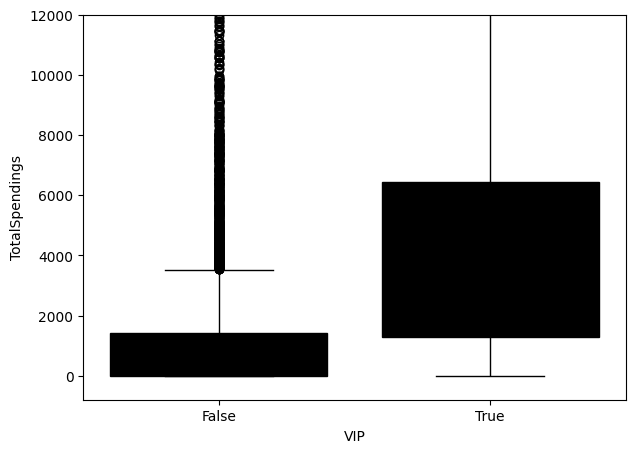

In [106]:
# VIP vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df_1, x = "VIP", y = "TotalSpendings", color='black')
plt.ylim([-800, 12000])

(-800.0, 12000.0)

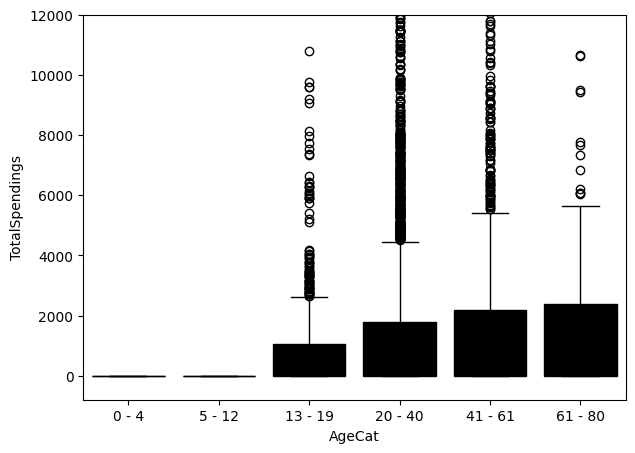

In [107]:
# AgeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df_1, x = "AgeCat", y = "TotalSpendings", color='black')
plt.ylim([-800, 12000])

### Preprocessing and cleaning data

In [109]:
train_df.shape

(8693, 14)

In [110]:
train_df_1.shape

(8693, 27)

In [111]:
train_df_2 = train_df_1.copy()

In [112]:
train_df_2 = train_df_2.drop(["PassengerGroup", "CabinDeck", "CabinNo.", "CabinSide", "FamilyName", "NoRelatives", "NoInPassengerGroup", "AgeCat", "FamilySizeCat", "TotalSpendings"], axis = 1)

In [113]:
train_df_2.shape

(8693, 17)

In [114]:
target = train_df_2['Transported']
test_passengerid = test_df_1['PassengerId']

In [115]:
train_df_3 = train_df_2.drop(['Transported'], axis=1)
data = pd.concat([train_df_3, test_df], axis=0).reset_index(drop=True)

In [116]:
data.shape

(12970, 16)

In [117]:
data.isna().sum()

PassengerId         0
HomePlanet        288
CryoSleep         310
Cabin             299
Destination       274
Age               270
VIP               296
RoomService       263
FoodCourt         289
ShoppingMall      306
Spa               284
VRDeck            268
Name              294
IsAlone          4277
NoRelatives_x    4477
NoRelatives_y    4477
dtype: int64

In [120]:
data_1 = data.copy()
missing_cat_columns = list((data_1.select_dtypes(['object', 'category']).isna().sum() > 0).index)
missing_cat_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'IsAlone']

In [123]:
#replacing categorical missing data with the most often appearing data
for col in missing_cat_columns:
    data_1[col] = data_1[col].fillna(data_1[col].mode()[0])

In [124]:
missing_num_col = list((data_1.select_dtypes(np.number).isna().sum() > 0).index)
missing_num_col

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'NoRelatives_x',
 'NoRelatives_y']

In [125]:
# Filling NaNs based on Age
def fill_nans_by_age_and_cryosleep(df):
    df["RoomService"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["RoomService"])
    df["FoodCourt"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["FoodCourt"])
    df["ShoppingMall"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["ShoppingMall"])
    df["Spa"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["Spa"])
    df["VRDeck"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["VRDeck"])
    
    return df

data_1 = fill_nans_by_age_and_cryosleep(data_1)

In [136]:
for col in missing_num_col:
    data_1[col] = data_1[col].fillna(data_1[col].mean())
data_1.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
IsAlone          0
NoRelatives_x    0
NoRelatives_y    0
dtype: int64

In [140]:
data_1 = data_1.drop(['IsAlone', 'NoRelatives_x', 'NoRelatives_y'], axis=1)

In [141]:
# clip outliers on 99% quantile
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df      
    
data_1 = clipping_quantile(data_1, None, 0.99)

In [142]:
def extract_features(df):
    df["PassengerGroup"] = (df["PassengerId"].str.split('_', expand = True))[0]
    
    No_People_In_PassengerGroup = df.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
    No_People_In_PassengerGroup = No_People_In_PassengerGroup.rename(columns = {"PassengerId": "NoInPassengerGroup"})
    # Create IsAlone feature
    No_People_In_PassengerGroup["IsAlone"] = No_People_In_PassengerGroup["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
    df = df.merge(No_People_In_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])
    
    # Create CabinDeck feature
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    # Create DeckPosition feature
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    # Create CabinSide feature
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]
    
    # Create Regular feature
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"] 
    # Create Luxury feature
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    # Create TotalSpendings feature
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]
    
    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()
    # Create DeckAverageSpent feature
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']
    
    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])
    
    df["FamilyName"] = df["Name"].str.split(' ', expand = True)[1]
    # Create NoRelatives feature
    NoRelatives = df.groupby('FamilyName')['PassengerId'].count().reset_index()
    NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})
    
    df = df.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])
    # Create FamilySizeCat feature
    df["FamilySizeCat"] = pd.cut(df.NoRelatives, bins = [0, 2, 5, 10, 300], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 208'])
    
    return df

data_2 = data_1.copy()
data_2 = extract_features(data_2)

In [143]:
data_3 = data_2.copy()
irrelevant_columns = ["Cabin", "PassengerId", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "FamilyName", "PassengerGroup"]
data_3 = data_3.drop(irrelevant_columns, axis = 1)

data_3.shape

(12970, 15)

In [144]:
# Categorical Encoding
data_3 = pd.get_dummies(data_3, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide', 'IsAlone'])

# Ordinal Encoding
for col in ['CabinDeck', 'DeckPosition', 'FamilySizeCat']:
    data_3[col], _ = data_3[col].factorize()

In [145]:
data_3.head()

,Age,CabinDeck,DeckPosition,Regular,Luxury,TotalSpendings,DeckAverageSpent,NoRelatives,FamilySizeCat,HomePlanet_Earth,...,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,CabinSide_P,CabinSide_S,IsAlone_Alone,IsAlone_Not Alone
0,39.0,0,0,0.0,0.0000,0.0000,2425.121912,3,0,False,...,False,False,False,True,True,False,True,False,True,False
1,24.0,1,1,34.0,702.0000,736.0000,988.635598,4,0,True,...,False,False,False,True,True,False,False,True,True,False
2,58.0,2,0,3576.0,5473.5766,9049.5766,3020.880183,7,1,False,...,False,False,False,True,False,True,False,True,False,True
3,33.0,2,0,1654.0,3522.0000,5176.0000,3020.880183,7,1,False,...,False,False,False,True,True,False,False,True,False,True
4,16.0,1,1,221.0,870.0000,1091.0000,988.635598,9,1,True,...,False,False,False,True,True,False,False,True,True,False


In [146]:
# split the data back to get the train and test data
data_4 = data_3.copy()
train_data_final = data_4.loc[:train_df.index.max(),  :].copy()
test_data_final = data_4.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()

In [148]:
print(train_data_final.shape)
print(test_data_final.shape)

(8693, 23)
(4277, 23)


## Model building

In [150]:
X = train_data_final.copy()
y = target.astype(int)

In [151]:
# Univariate feature selection
chi_selector = SelectKBest(chi2, k = 22).fit(X, y)

chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns
chi_feature

Index(['Age', 'CabinDeck', 'DeckPosition', 'Regular', 'Luxury',
       'TotalSpendings', 'DeckAverageSpent', 'NoRelatives', 'FamilySizeCat',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'CabinSide_P',
       'CabinSide_S', 'IsAlone_Alone', 'IsAlone_Not Alone'],
      dtype='object')

In [152]:
X = X[chi_feature]

# baseline model
baseline_model = RandomForestClassifier(random_state = 1)
baseline_model.fit(X, y)

RandomForestClassifier(random_state=1)

In [153]:
# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, X, y, cv = 20, scoring = "accuracy")

# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

0.7884509243074316
0.01953326911918075


In [154]:
# provide range for max_depth from 1 to 20 with an interval of 2 
# provide range for n_estimators from 1 to 200 with an interval of 20
paramgrid = {'max_depth': list(range(1, 20, 2)), 
             'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

# fit the grid search model
grid_search.fit(X, y)

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)

In [156]:
model = RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)

In [157]:
result_after_gscv = cross_val_score(model, X, y, cv = 20, scoring = "accuracy")

print(np.mean(result_after_gscv))
print(np.std(result_after_gscv))

0.8044459452301499
0.018368391001570065


In [159]:
prediction = model.predict(test_data_final[chi_feature])

In [161]:
sample_submission_df = pd.read_csv('./data/sample_submission.csv')
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [162]:
pred_dict = {"PassengerId" : test_df_1["PassengerId"], "Transported": prediction}
pred_df = pd.DataFrame(pred_dict)

In [163]:
pred_df["Transported"] = pred_df["Transported"].map({1 : True, 0: False})

In [165]:
pred_df.to_csv("predictions.csv", index = False)

## Feature importance

<Axes: >

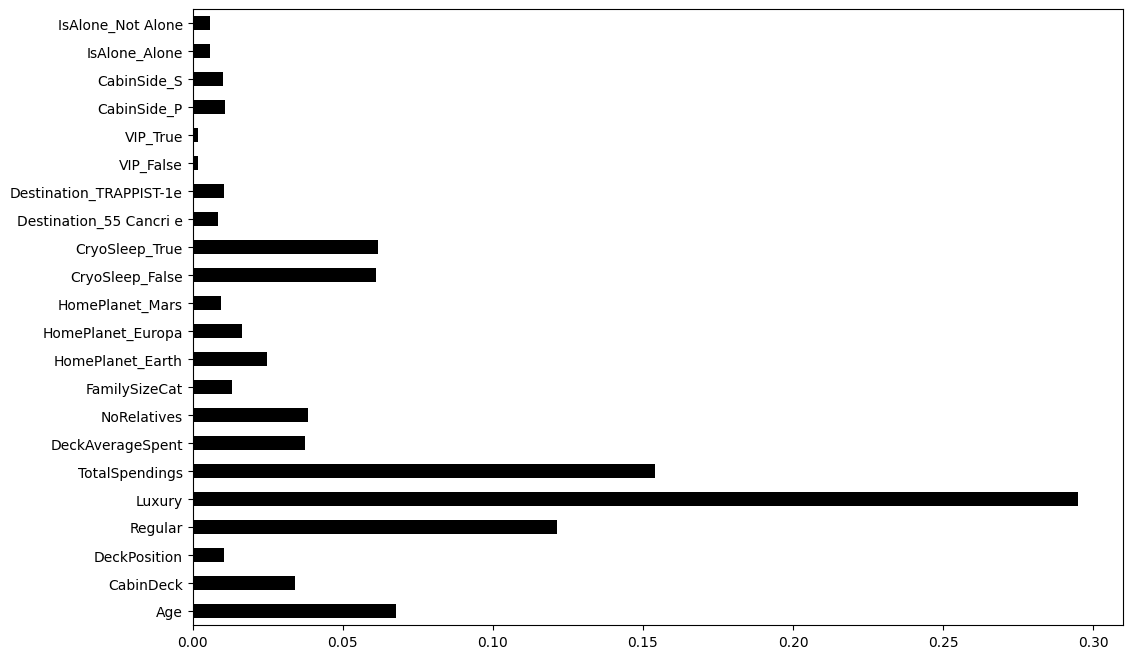

In [168]:
importances = pd.Series(model.feature_importances_, index = X.columns)
importances.plot(kind = 'barh', figsize = (12, 8), color='black')